In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('BF_data.csv', index_col=[0])
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,SAT_1,SAT_2,SAT_3,SAT_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,121.0,2.0,22.22,21.00,3.88,69.940478,73.583364,77.713731,82.332439,85.074844
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,125.0,1.0,22.56,21.00,3.94,71.454476,74.666066,77.198904,82.604995,84.877672
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,124.0,1.0,22.49,21.08,3.94,70.579462,74.837214,78.518159,84.475989,83.397999
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,115.0,1.0,22.36,21.13,3.99,70.179791,75.008361,80.865417,84.880888,83.368013
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,1.0,22.25,21.30,4.10,70.728470,75.799102,82.564532,84.282448,84.592822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26471 entries, 0 to 26470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      26471 non-null  object 
 1   CB_FLOW        26471 non-null  float64
 2   CB_PRESS       26471 non-null  float64
 3   CB_TEMP        26471 non-null  float64
 4   STEAM_FLOW     26471 non-null  float64
 5   STEAM_TEMP     26471 non-null  float64
 6   STEAM_PRESS    26471 non-null  float64
 7   O2_PRESS       26471 non-null  float64
 8   O2_FLOW        26471 non-null  float64
 9   O2_PER         26471 non-null  float64
 10  PCI            26471 non-null  float64
 11  ATM_HUMID      26471 non-null  float64
 12  HB_TEMP        26471 non-null  float64
 13  HB_PRESS       26471 non-null  float64
 14  TOP_PRESS      26471 non-null  float64
 15  TOP_TEMP1      26471 non-null  float64
 16  TOP_TEMP2      26471 non-null  float64
 17  TOP_TEMP3      26471 non-null  float64
 18  TOP_TE

In [4]:
x_vars = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
x_vars.drop('DATE_TIME',axis=1,inplace=True)
y_vars = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

print(x_vars.shape, y_vars.shape)

(26471, 25) (26471, 4)


In [5]:
x_vars.head()

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470


In [6]:
y_vars.head()

,SAT_1,SAT_2,SAT_3,SAT_4
0,73.583364,77.713731,82.332439,85.074844
1,74.666066,77.198904,82.604995,84.877672
2,74.837214,78.518159,84.475989,83.397999
3,75.008361,80.865417,84.880888,83.368013
4,75.799102,82.564532,84.282448,84.592822


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size=0.3,  random_state=42)

In [8]:
column_list = pd.DataFrame(x_vars.columns.to_list(), columns=['Params'])
column_list.to_csv('columns.csv', index = False)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Building the model
model1 = Sequential()
model1.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 7,756
Trainable params: 7,756
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compiling the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights= True)

In [12]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model1.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=500,
                    batch_size=100,
                    verbose=1)

Epoch 1/500
186/186 [==============================] - 3s 6ms/step - loss: 2639.2722 - mae: 41.2593 - val_loss: 379.1195 - val_mae: 14.1687
Epoch 2/500
186/186 [==============================] - 1s 3ms/step - loss: 257.3246 - mae: 11.2556 - val_loss: 194.9775 - val_mae: 9.8442
Epoch 3/500
186/186 [==============================] - 1s 3ms/step - loss: 178.0815 - mae: 9.1923 - val_loss: 160.7313 - val_mae: 8.7081
Epoch 4/500
186/186 [==============================] - 1s 3ms/step - loss: 155.6905 - mae: 8.4259 - val_loss: 145.6567 - val_mae: 8.1469
Epoch 5/500
186/186 [==============================] - 1s 3ms/step - loss: 145.2712 - mae: 8.0231 - val_loss: 138.9105 - val_mae: 7.9623
Epoch 6/500
186/186 [==============================] - 1s 3ms/step - loss: 138.3543 - mae: 7.7765 - val_loss: 131.8949 - val_mae: 7.6676
Epoch 7/500
186/186 [==============================] - 1s 3ms/step - loss: 133.8463 - mae: 7.6192 - val_loss: 129.7096 - val_mae: 7.6291
Epoch 8/500
186/186 [================

Epoch 61/500
186/186 [==============================] - 1s 3ms/step - loss: 84.7211 - mae: 6.2768 - val_loss: 85.8700 - val_mae: 6.3969
Epoch 62/500
186/186 [==============================] - 1s 3ms/step - loss: 84.2015 - mae: 6.2682 - val_loss: 85.5050 - val_mae: 6.3369
Epoch 63/500
186/186 [==============================] - 1s 4ms/step - loss: 83.1417 - mae: 6.2133 - val_loss: 84.6910 - val_mae: 6.3407
Epoch 64/500
186/186 [==============================] - 1s 4ms/step - loss: 83.6364 - mae: 6.2642 - val_loss: 85.3716 - val_mae: 6.3528
Epoch 65/500
186/186 [==============================] - 1s 4ms/step - loss: 83.0568 - mae: 6.2144 - val_loss: 83.8653 - val_mae: 6.2934
Epoch 66/500
186/186 [==============================] - 1s 4ms/step - loss: 82.8317 - mae: 6.2113 - val_loss: 86.9302 - val_mae: 6.4783
Epoch 67/500
186/186 [==============================] - 1s 4ms/step - loss: 81.9588 - mae: 6.1937 - val_loss: 85.3983 - val_mae: 6.3338
Epoch 68/500
186/186 [==========================

186/186 [==============================] - 1s 3ms/step - loss: 70.3464 - mae: 5.8093 - val_loss: 75.6918 - val_mae: 5.9879
Epoch 122/500
186/186 [==============================] - 1s 3ms/step - loss: 69.4175 - mae: 5.7742 - val_loss: 83.0548 - val_mae: 6.3119
Epoch 123/500
186/186 [==============================] - 1s 4ms/step - loss: 70.0658 - mae: 5.7974 - val_loss: 76.7489 - val_mae: 6.0522
Epoch 124/500
186/186 [==============================] - 1s 4ms/step - loss: 69.3926 - mae: 5.7663 - val_loss: 75.4860 - val_mae: 6.0454
Epoch 125/500
186/186 [==============================] - 1s 4ms/step - loss: 70.0203 - mae: 5.8206 - val_loss: 78.8427 - val_mae: 6.1724
Epoch 126/500
186/186 [==============================] - 1s 4ms/step - loss: 69.3812 - mae: 5.7831 - val_loss: 79.8542 - val_mae: 6.2536
Epoch 127/500
186/186 [==============================] - 1s 4ms/step - loss: 69.4813 - mae: 5.7667 - val_loss: 80.5300 - val_mae: 6.2626
Epoch 128/500
186/186 [==============================] 

Epoch 181/500
186/186 [==============================] - 1s 3ms/step - loss: 63.0018 - mae: 5.5056 - val_loss: 70.8747 - val_mae: 5.8359
Epoch 182/500
186/186 [==============================] - 1s 4ms/step - loss: 63.0626 - mae: 5.5213 - val_loss: 71.6581 - val_mae: 5.8708
Epoch 183/500
186/186 [==============================] - 1s 4ms/step - loss: 62.3351 - mae: 5.5032 - val_loss: 71.4158 - val_mae: 5.8174
Epoch 184/500
186/186 [==============================] - 1s 4ms/step - loss: 62.8984 - mae: 5.4955 - val_loss: 69.7124 - val_mae: 5.7570
Epoch 185/500
186/186 [==============================] - 1s 4ms/step - loss: 62.3402 - mae: 5.4815 - val_loss: 69.4035 - val_mae: 5.7556
Epoch 186/500
186/186 [==============================] - 1s 4ms/step - loss: 63.6352 - mae: 5.5554 - val_loss: 70.6995 - val_mae: 5.8112
Epoch 187/500
186/186 [==============================] - 1s 4ms/step - loss: 62.0969 - mae: 5.4847 - val_loss: 68.6964 - val_mae: 5.7323
Epoch 188/500
186/186 [==================

Epoch 241/500
186/186 [==============================] - 1s 4ms/step - loss: 58.3356 - mae: 5.3088 - val_loss: 67.6657 - val_mae: 5.7478
Epoch 242/500
186/186 [==============================] - 1s 4ms/step - loss: 58.1037 - mae: 5.2998 - val_loss: 68.7156 - val_mae: 5.7376
Epoch 243/500
186/186 [==============================] - 1s 4ms/step - loss: 58.5305 - mae: 5.3170 - val_loss: 67.5764 - val_mae: 5.8166
Epoch 244/500
186/186 [==============================] - 1s 4ms/step - loss: 58.7401 - mae: 5.3171 - val_loss: 69.2758 - val_mae: 5.8933
Epoch 245/500
186/186 [==============================] - 1s 4ms/step - loss: 58.5355 - mae: 5.3306 - val_loss: 68.6944 - val_mae: 5.7049
Epoch 246/500
186/186 [==============================] - 1s 4ms/step - loss: 58.1118 - mae: 5.3016 - val_loss: 69.5122 - val_mae: 5.7502
Epoch 247/500
186/186 [==============================] - 1s 4ms/step - loss: 58.3165 - mae: 5.3154 - val_loss: 68.5647 - val_mae: 5.7543
Epoch 248/500
186/186 [==================

Epoch 301/500
186/186 [==============================] - 1s 4ms/step - loss: 56.2594 - mae: 5.2127 - val_loss: 67.3866 - val_mae: 5.7438
Epoch 302/500
186/186 [==============================] - 1s 4ms/step - loss: 55.4771 - mae: 5.1916 - val_loss: 65.8043 - val_mae: 5.5546
Epoch 303/500
186/186 [==============================] - 1s 4ms/step - loss: 55.7312 - mae: 5.2172 - val_loss: 65.8813 - val_mae: 5.6988
Epoch 304/500
186/186 [==============================] - 1s 4ms/step - loss: 56.2408 - mae: 5.2252 - val_loss: 64.5569 - val_mae: 5.6016
Epoch 305/500
186/186 [==============================] - 1s 4ms/step - loss: 55.4102 - mae: 5.1781 - val_loss: 64.4803 - val_mae: 5.5398
Epoch 306/500
186/186 [==============================] - 1s 4ms/step - loss: 54.9293 - mae: 5.1524 - val_loss: 69.7309 - val_mae: 5.7744
Epoch 307/500
186/186 [==============================] - 1s 4ms/step - loss: 56.3921 - mae: 5.2290 - val_loss: 69.2776 - val_mae: 5.7746
Epoch 308/500
186/186 [==================

Epoch 361/500
186/186 [==============================] - 1s 5ms/step - loss: 53.3478 - mae: 5.0824 - val_loss: 64.0079 - val_mae: 5.5072
Epoch 362/500
186/186 [==============================] - 1s 4ms/step - loss: 53.4581 - mae: 5.1008 - val_loss: 67.9921 - val_mae: 5.8574
Epoch 363/500
186/186 [==============================] - 1s 5ms/step - loss: 53.4657 - mae: 5.0828 - val_loss: 65.0100 - val_mae: 5.5535
Epoch 364/500
186/186 [==============================] - 1s 4ms/step - loss: 52.6169 - mae: 5.0479 - val_loss: 62.9348 - val_mae: 5.5477
Epoch 365/500
186/186 [==============================] - 1s 4ms/step - loss: 53.0996 - mae: 5.0736 - val_loss: 64.3469 - val_mae: 5.6108
Epoch 366/500
186/186 [==============================] - 1s 4ms/step - loss: 53.4313 - mae: 5.0711 - val_loss: 65.4666 - val_mae: 5.6269
Epoch 367/500
186/186 [==============================] - 1s 4ms/step - loss: 54.2077 - mae: 5.1279 - val_loss: 64.9709 - val_mae: 5.5453
Epoch 368/500
186/186 [==================

Epoch 421/500
186/186 [==============================] - 1s 4ms/step - loss: 51.9922 - mae: 5.0292 - val_loss: 62.4021 - val_mae: 5.5039
Epoch 422/500
186/186 [==============================] - 1s 4ms/step - loss: 52.6912 - mae: 5.0413 - val_loss: 69.0458 - val_mae: 5.7114
Epoch 423/500
186/186 [==============================] - 1s 4ms/step - loss: 52.0085 - mae: 5.0152 - val_loss: 62.6031 - val_mae: 5.4182
Epoch 424/500
186/186 [==============================] - 1s 5ms/step - loss: 51.2841 - mae: 4.9783 - val_loss: 64.7834 - val_mae: 5.5800
Epoch 425/500
186/186 [==============================] - 1s 5ms/step - loss: 51.6413 - mae: 4.9983 - val_loss: 61.8526 - val_mae: 5.4156
Epoch 426/500
186/186 [==============================] - 1s 4ms/step - loss: 51.9712 - mae: 5.0178 - val_loss: 61.8904 - val_mae: 5.4485
Epoch 427/500
186/186 [==============================] - 1s 5ms/step - loss: 51.4473 - mae: 4.9909 - val_loss: 63.6232 - val_mae: 5.6301
Epoch 428/500
186/186 [==================

Epoch 481/500
186/186 [==============================] - 1s 4ms/step - loss: 49.7817 - mae: 4.9072 - val_loss: 61.9317 - val_mae: 5.5285
Epoch 482/500
186/186 [==============================] - 1s 4ms/step - loss: 50.8767 - mae: 4.9622 - val_loss: 60.2393 - val_mae: 5.3764
Epoch 483/500
186/186 [==============================] - 1s 4ms/step - loss: 50.5025 - mae: 4.9405 - val_loss: 65.1465 - val_mae: 5.6861
Epoch 484/500
186/186 [==============================] - 1s 4ms/step - loss: 50.4665 - mae: 4.9277 - val_loss: 63.3781 - val_mae: 5.4957
Epoch 485/500
186/186 [==============================] - 1s 4ms/step - loss: 50.2497 - mae: 4.9308 - val_loss: 61.0846 - val_mae: 5.3949
Epoch 486/500
186/186 [==============================] - 1s 4ms/step - loss: 50.2435 - mae: 4.9388 - val_loss: 60.7802 - val_mae: 5.4667
Epoch 487/500
186/186 [==============================] - 1s 4ms/step - loss: 50.7824 - mae: 4.9621 - val_loss: 62.2018 - val_mae: 5.4177
Epoch 488/500
186/186 [==================

In [13]:
trainpreds = model1.predict(x_train)
predicted_val = model1.predict(x_test)

249/249 [==============================] - 0s 2ms/step


In [14]:
print(f"The accuracy of the ANN model is : {round(r2_score(y_test,predicted_val)*100,4)}")

The accuracy of the ANN model is : 90.9549


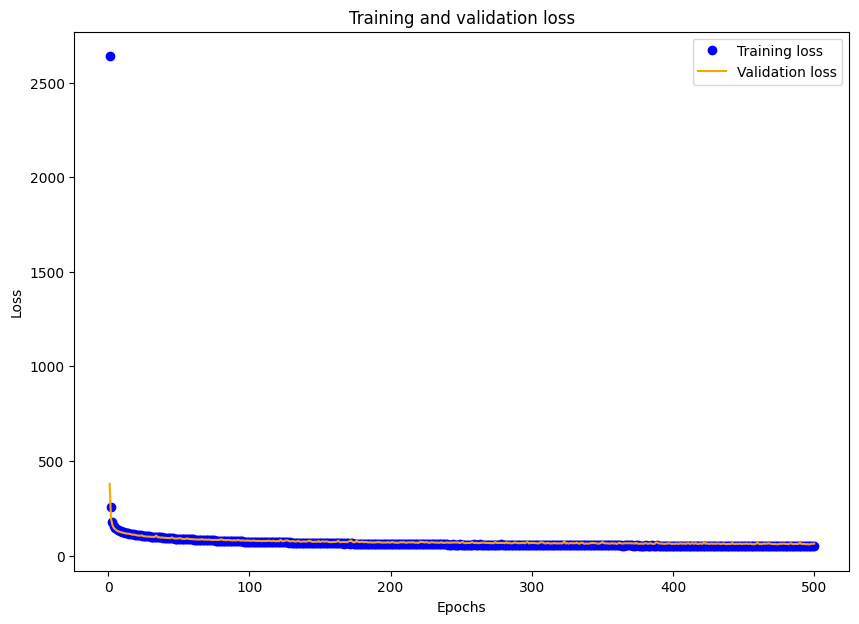

In [15]:
plt.figure(figsize=(10,7))
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
val_loss_values

[379.1195373535156,
 194.9775390625,
 160.7312774658203,
 145.6566925048828,
 138.9104766845703,
 131.8948516845703,
 129.70956420898438,
 125.2426986694336,
 123.8605728149414,
 121.18756866455078,
 119.94397735595703,
 118.37258911132812,
 116.16407775878906,
 115.4499282836914,
 115.2719497680664,
 113.22870635986328,
 110.21063995361328,
 110.88529968261719,
 109.64743041992188,
 107.5105972290039,
 106.12749481201172,
 105.75507354736328,
 105.05976867675781,
 106.91079711914062,
 101.73624420166016,
 101.70027160644531,
 100.80178833007812,
 100.04713439941406,
 100.30146789550781,
 99.16883087158203,
 98.88761138916016,
 98.50554656982422,
 98.75020599365234,
 106.54344177246094,
 96.89936828613281,
 97.34513854980469,
 94.55894470214844,
 96.6099853515625,
 93.6636734008789,
 94.20490264892578,
 93.33478546142578,
 92.81055450439453,
 92.70358276367188,
 91.30236053466797,
 96.13553619384766,
 92.4758529663086,
 89.97024536132812,
 90.19120788574219,
 90.07691192626953,
 91.296

249/249 [==============================] - 1s 2ms/step


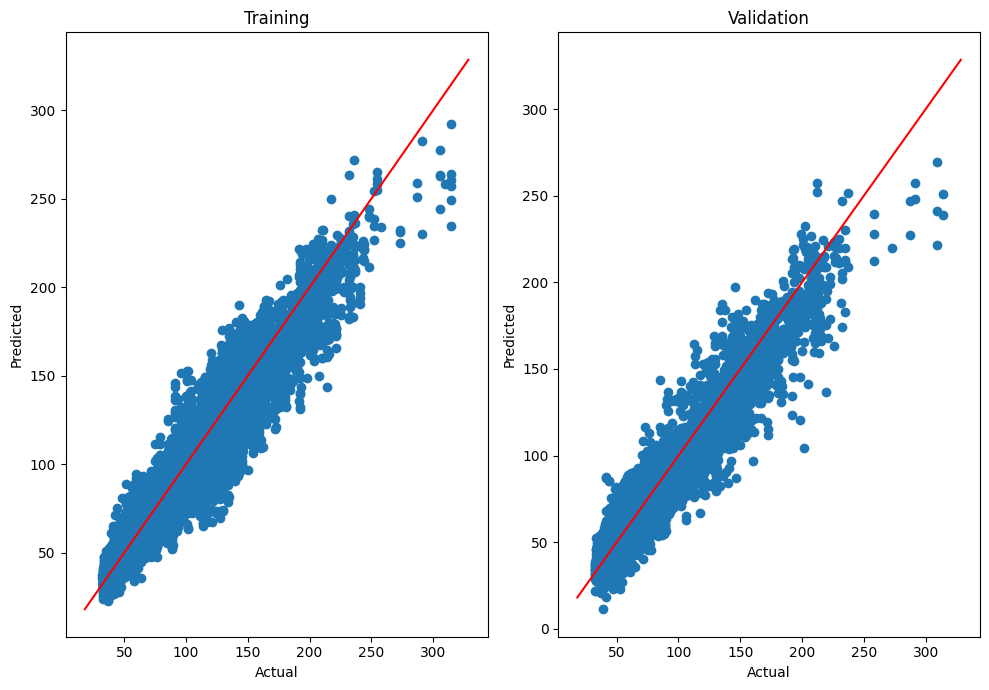

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,7)) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model1.predict(x_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model1.predict(x_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [18]:
import joblib
joblib.dump(model1, 'dnn_model.pkl')

['dnn_model.pkl']

In [19]:
cols = x_vars.columns.to_list()
row = np.array([311727,3.15,129,4,213,3.34,3.2,7296,23.08,32,24.56,1060,2.99,1.5,112,135,107,130,0,121,2,22.22,21,3.88,69.940478])
row = scaler.transform([row])
X = pd.DataFrame(row, columns=cols)
prediction = model1.predict(X)
prediction

1/1 [==============================] - 0s 68ms/step


C:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[72.59029, 73.10807, 73.4363 , 73.53062]], dtype=float32)